In [5]:
'''
Script for dynamic programming exercise 1
'''
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# problem 1
A = [[0.6, 0.1, -0.3],
     [0.5, -0.4, 0.2],
     [1.0, -0.2, 1.1]]

b = [[12],
     [10],
     [-1]]

A, b = map(np.asarray, (A, b))

from scipy.linalg import eigvals, solve
evs = eigvals(A)
ρ = max(abs(evs))
print("Spectral radius condition: ","\t", ρ)

# solving x using progressive approximation
# initial value
tol = 1e-10
epsilon = 1
x_old  = np.array([1, 1, 1]).reshape([3, 1])
while epsilon >= tol:
    x_new = np.dot(A, x_old) + b
    epsilon = (((x_new - x_old)/x_old)**2).sum()
    x_old = x_new
print("Solution: \n",x_old)

Spectral radius condition:  	 0.965538166352
Solution: 
 [[ -0.89573125]
 [ 13.34324224]
 [ 45.64190719]]


In [7]:
# Problem 2 Job search model
# we will firstly design a function to compute the reservation wage
def get_rwage(c, *args):
    rw_init, beta, wage, prob, epsilon_init, tol = args
    wage, prob = map(np.asarray, (wage, prob))
    rw_old = rw_init
    epsilon = epsilon_init
    while epsilon >= tol:
        rw_new  = c*(1 - beta) + beta*(np.multiply((np.maximum(rw_old, wage)), prob).sum())
        epsilon = (((rw_new - rw_old)/rw_old)**2).sum()
        rw_old  = rw_new
    return(rw_old)


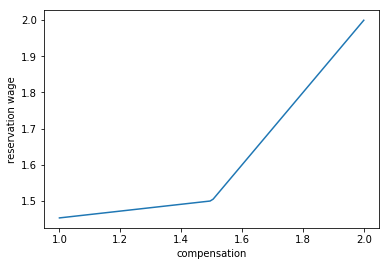

In [8]:
# problem 3
#testing on my computational strategy
rw_init = 1
beta = 0.96
wage = (0.5, 1.0, 1.5)
prob = (0.2,0.4,0.4)
c_vals = np.linspace(1, 2, 100)
epsilon_init = 0.1
tol = 1e-10
rw_args = (rw_init, beta, wage, prob, epsilon_init, tol)
def get_rwage_vec(c_vals, *args):
    rw_vals = np.zeros_like(c_vals)
    rw_init, beta, wage, prob, epsilon_init, tol = args
    for i in range(0, len(c_vals)):
        rw_vals[i] = get_rwage(c_vals[i], *args)
    return(rw_vals)

#plotting
rwage_val = get_rwage_vec(c_vals, *rw_args)
plt.plot(c_vals, rwage_val)
plt.xlabel('compensation')
plt.ylabel('reservation wage')
plt.show()
